In [59]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2 as cv
import matplotlib.pyplot as plt

In [60]:
import wget
url = "https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task"
filename = wget.download(url)

In [61]:
filename

'hand_landmarker (13).task'

## Visualization utilities

In [62]:
#@markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import math

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def get_distance_from_zero(points):
  for idx, hand_points in enumerate(points):
    print(f"idx: {idx}, hand_points: {hand_points}")
    for x, y, z in hand_points:
        distance = math.sqrt(x**2 + y**2 + z**2)  # Euclidean distance formula
        print(f"Distancia desde el punto 0: {distance}")


def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)
  points = []


  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    
    # Guardo los puntos en una lista aparte
    points.append([(landmark.x, landmark.y, landmark.z) for landmark in hand_landmarks])
    get_distance_from_zero(points)

    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv.LINE_AA)

  return annotated_image

## Load test image

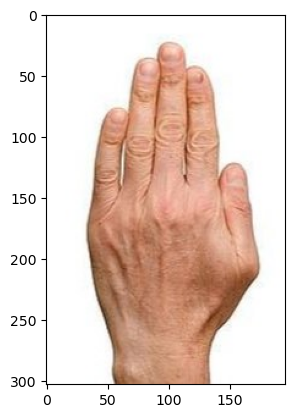

In [63]:
foto = cv.imread("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Programacion de IA\\tirmestre_2\\imagenes\\papel.jpg")
img = cv.cvtColor(foto, cv.COLOR_BGR2RGB)
plt.imshow(img)

idx: 0, hand_points: [(0.4669308066368103, 0.8952116966247559, 8.118652772282076e-07), (0.6947611570358276, 0.8019614219665527, -0.01510708499699831), (0.8071033954620361, 0.675317645072937, -0.025279130786657333), (0.7940231561660767, 0.5330445766448975, -0.029412172734737396), (0.7850134372711182, 0.4364706873893738, -0.037175048142671585), (0.6477456092834473, 0.530495822429657, -0.06261599808931351), (0.6509270668029785, 0.34420931339263916, -0.10036920011043549), (0.6470653414726257, 0.24755942821502686, -0.1232377141714096), (0.6373682022094727, 0.16775298118591309, -0.1376376450061798), (0.4887099266052246, 0.5271904468536377, -0.07619313150644302), (0.5091409683227539, 0.32361122965812683, -0.12931041419506073), (0.5127492547035217, 0.19804376363754272, -0.16553238034248352), (0.5083838701248169, 0.1015380322933197, -0.18922844529151917), (0.35240408778190613, 0.5465324521064758, -0.08587166666984558), (0.37726613879203796, 0.355654776096344, -0.1326739490032196), (0.3967468440

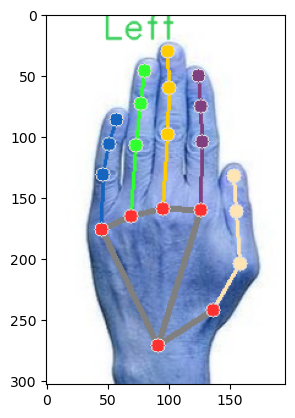

In [64]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Programacion de IA\\tirmestre_2\\imagenes\\papel.jpg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(cv.cvtColor(annotated_image, cv.COLOR_RGB2BGR))

In [65]:
import mediapipe as mp

path_modelo = "C:\\Users\\daniel.martinezcarre\\Desktop\\Clase\\modelos_descargados\\hand_landmarker.task"

BaseOptions = mp.tasks.BaseOptions
HandLandmarker = mp.tasks.vision.HandLandmarker
HandLandmarkerOptions = mp.tasks.vision.HandLandmarkerOptions
HandLandmarkerResult = mp.tasks.vision.HandLandmarkerResult
VisionRunningMode = mp.tasks.vision.RunningMode

# Create a hand landmarker instance with the live stream mode:
def print_result(result: HandLandmarkerResult, output_image: mp.Image, timestamp_ms: int):
    print('hand landmarker result: {}'.format(result))

options = HandLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=path_modelo),
    running_mode=VisionRunningMode.VIDEO,
    num_hands=2)


In [66]:
import time
import math

# Definimos el índice de la cámara (0 para la cámara web predeterminada)
camara_indice = 0

# Capturamos la cámara
cap = cv.VideoCapture(camara_indice)

# Verificamos si la cámara se abrió correctamente
if not cap.isOpened():
    print("Error al abrir la cámara")
    exit()

with HandLandmarker.create_from_options(options) as landmarker:
    timestamp_inicial = time.time()
    # Bucle para leer y mostrar frames
    while True:

        # Leemos un frame
        ret, frame = cap.read()

        # Si no se pudo leer el frame, salimos del bucle
        if not ret:
            print("Error al leer el frame")
            break

        # Mostramos el frame en una ventana
        cv.imshow("Video en vivo", frame)


        # PREPARE DATA: Convert the frame received from OpenCV to a MediaPipe’s Image object.
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)


        frame_timestamp_ms = round((time.time() - timestamp_inicial) * 1000)
        
        # RUN THE TASK: The hand landmarker must be created with the live stream mode.
        landmaker_detection = landmarker.detect_for_video(mp_image, frame_timestamp_ms)

        # STEP 5: Process the classification result. In this case, visualize it.
        annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), landmaker_detection)
        cv.imshow("Detección de manos",annotated_image)

        # Salimos del bucle si se presiona la tecla "q"
        if cv.waitKey(1) & 0xFF == ord("q"):
            break

    # Liberamos la cámara
    cap.release()

    # Cerramos todas las ventanas
    cv.destroyAllWindows()


idx: 0, hand_points: [(0.10905434191226959, 0.4380248785018921, 1.7056711953955528e-07), (0.15812814235687256, 0.41498884558677673, -0.04096193239092827), (0.2071744203567505, 0.3497312664985657, -0.05438651144504547), (0.23920956254005432, 0.27935782074928284, -0.060959961265325546), (0.2596225440502167, 0.22034750878810883, -0.06736842542886734), (0.17331212759017944, 0.25573837757110596, -0.03309834748506546), (0.17874446511268616, 0.16811108589172363, -0.04679711535573006), (0.17363230884075165, 0.1063585877418518, -0.058530811220407486), (0.16719920933246613, 0.05621540546417236, -0.06933598965406418), (0.13366051018238068, 0.24579943716526031, -0.02070392481982708), (0.12104417383670807, 0.1924571990966797, -0.03787856921553612), (0.11168364435434341, 0.20811030268669128, -0.04756471514701843), (0.10726563632488251, 0.2206714004278183, -0.054249852895736694), (0.09425754100084305, 0.2519347369670868, -0.012382203713059425), (0.08673819899559021, 0.18937072157859802, -0.0302772857